In [2]:
import pandas as pd
import urllib.request
import matplotlib

## Download latest covid cases file

In [3]:
url = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'
urllib.request.urlretrieve(url, "Covid19Casos.csv")

('Covid19Casos.csv', <http.client.HTTPMessage at 0x2d3154491f0>)

## CSV to Dataframe

In [4]:
covidDF = pd.read_csv('Covid19Casos.csv')

## Useful transformantions

In [9]:
covidConfirmedDF = covidDF[covidDF['clasificacion_resumen'] == 'Confirmado']
covidDeathsDF = covidDF[covidDF['fallecido'] == 'SI']

## Infected by Province

,count
residencia_provincia_nombre,
Buenos Aires,252675
CABA,93515
Córdoba,8129
Jujuy,8089
Santa Fe,7430
Mendoza,6546
Río Negro,5870
Chaco,5342
Entre Ríos,3171


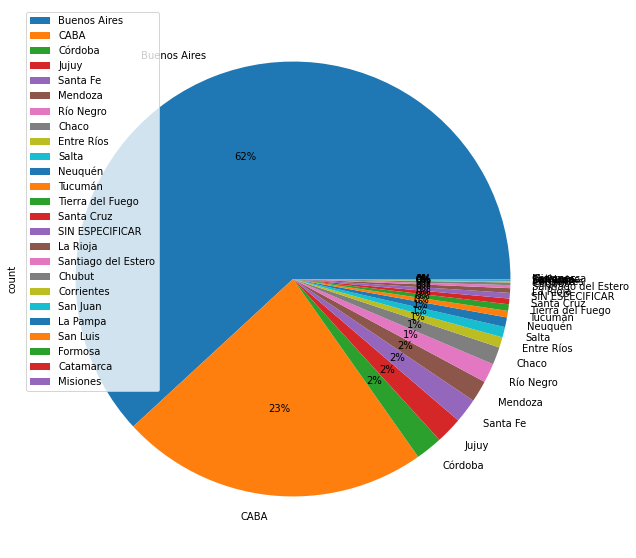

In [77]:
casesPerProvince = covidConfirmedDF.copy()
casesPerProvince['count'] = covidConfirmedDF.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
casesPerProvince = casesPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
casesPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', autopct='%1.0f%%', figsize=(10,10)).set_title("Infecteds by province")
casesPerProvince.set_index('residencia_provincia_nombre')

## Deaths by Province


,count
residencia_provincia_nombre,
Buenos Aires,7463
CABA,3035
Chaco,366
Jujuy,238
Mendoza,226
Río Negro,209
Entre Ríos,197
Córdoba,156
Santa Fe,124


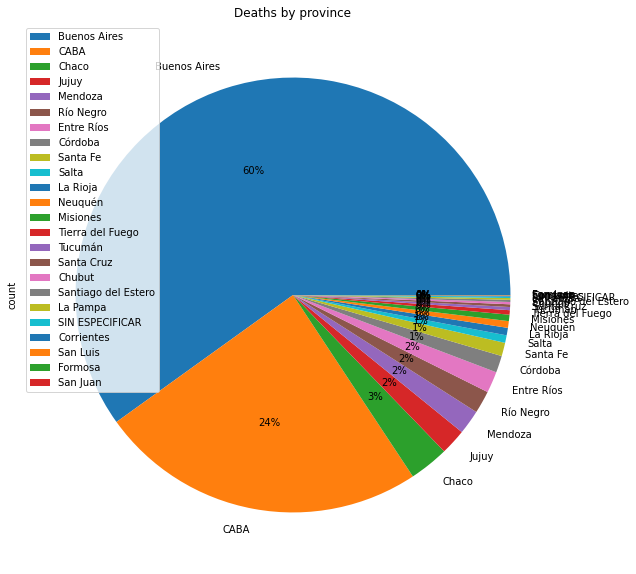

In [87]:
deathsPerProvince = covidDeathsDF.copy()
deathsPerProvince['count'] = deathsPerProvince.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
deathsPerProvince = deathsPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
deathsPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', autopct='%1.0f%%', figsize=(10,10)).set_title("Deaths by province")
deathsPerProvince.set_index('residencia_provincia_nombre')

## Deaths and infecteds by age

<ipython-input-100-3f0d4389dcfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infectedsByAge['edad'] = infectedsByAge['edad'].apply(lambda x: x - (x % 10))
<ipython-input-100-3f0d4389dcfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infectedsByAge['count'] = infectedsByAge.groupby('edad')['edad'].transform('count')
<ipython-input-100-3f0d4389dcfd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

       count
edad        
30.0   96241
20.0   82949
40.0   76948
50.0   52569
60.0   28099
10.0   25447
70.0   15175
0.0    13717
80.0   10566
90.0    4168
100.0    137
120.0     38
110.0      5
       count
edad        
70.0    3156
80.0    3108
60.0    2363
90.0    1326
50.0    1239
40.0     639
30.0     283
20.0     158
100.0     47
0.0       45
10.0      43
120.0      1


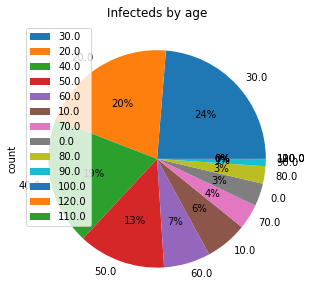

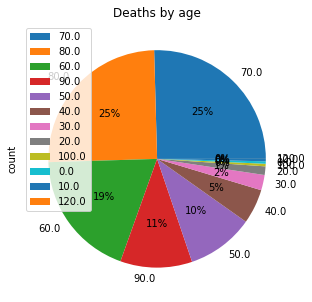

In [100]:
infectedsByAge = covidConfirmedDF[covidConfirmedDF['edad_años_meses'] == 'Años']
infectedsByAge['edad'] = infectedsByAge['edad'].apply(lambda x: x - (x % 10))
infectedsByAge['count'] = infectedsByAge.groupby('edad')['edad'].transform('count')
infectedsByAge = infectedsByAge[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
infectedsByAge.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Infecteds by age")
print(infectedsByAge.set_index('edad').head(20))

deathsByAge = covidDeathsDF[covidDeathsDF['edad_años_meses'] == 'Años']
deathsByAge['edad'] = deathsByAge['edad'].apply(lambda x: x - (x % 10))
deathsByAge['count'] = deathsByAge.groupby('edad')['edad'].transform('count')
deathsByAge = deathsByAge[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
deathsByAge.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Deaths by age")
print(deathsByAge.set_index('edad').head(20))

## Deaths and infected by genre

Text(0.5, 1.0, 'Deaths by Genre')

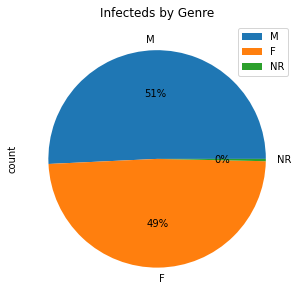

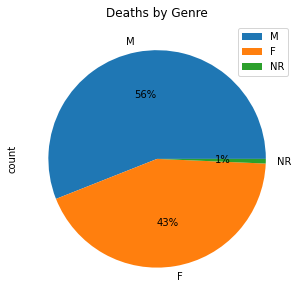

In [86]:
infectedsByGenre = covidConfirmedDF.copy()
infectedsByGenre['count'] = infectedsByGenre.groupby('sexo')['sexo'].transform('count')
infectedsByGenre = infectedsByGenre[['sexo', 'count']].groupby('sexo').count().reset_index().sort_values('count', ascending=False)
infectedsByGenre.set_index('sexo').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Infecteds by Genre")

deathsByGenre = covidDeathsDF.copy()
deathsByGenre['count'] = deathsByGenre.groupby('sexo')['sexo'].transform('count')
deathsByGenre = deathsByGenre[['sexo', 'count']].groupby('sexo').count().reset_index().sort_values('count', ascending=False)
deathsByGenre.set_index('sexo').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Deaths by Genre")

### Bonus Track: Biggers than hundred years and newborns

       count
edad        
120.0     38
101.0     27
102.0     23
103.0      9
104.0      5
119.0      5
105.0      4
108.0      2
106.0      1
107.0      1
109.0      1
       count
edad        
101.0      8
103.0      8
102.0      6
104.0      2
105.0      1
106.0      1
108.0      1
120.0      1
      count
edad       
8.0     235
11.0    235
9.0     212
10.0    211
6.0     210
7.0     203
4.0     188
5.0     187
3.0     153
2.0     138
1.0      94
0.0      38
      count
edad       
7.0       6
2.0       5
3.0       5
6.0       5
4.0       3
5.0       2
8.0       2
9.0       2
0.0       1
1.0       1
10.0      1
11.0      1


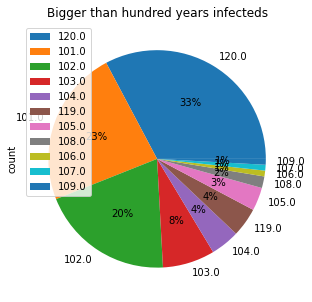

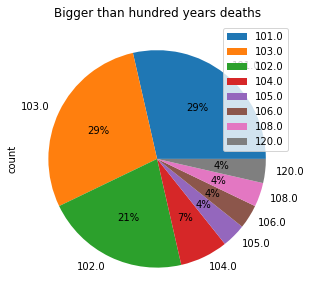

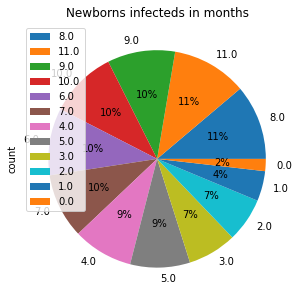

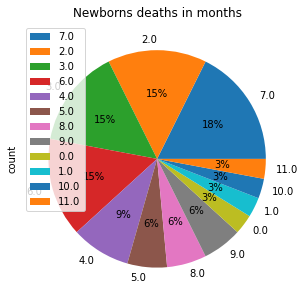

In [112]:
hundredYearsInfecteds = covidConfirmedDF[covidConfirmedDF['edad_años_meses'] == 'Años']
hundredYearsInfecteds = hundredYearsInfecteds[hundredYearsInfecteds['edad'] > 100.0]
hundredYearsInfecteds['count'] = hundredYearsInfecteds.groupby('edad')['edad'].transform('count')
hundredYearsInfecteds = hundredYearsInfecteds[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
hundredYearsInfecteds.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Bigger than hundred years infecteds")
print(hundredYearsInfecteds.set_index('edad').head(20))
# It appears that the value 120.0 it's a mispeal in the data entry cause there is no registry of people with that age in Argentina

hundredYearsDeaths = covidDeathsDF[covidDeathsDF['edad_años_meses'] == 'Años']
hundredYearsDeaths = hundredYearsDeaths[hundredYearsDeaths['edad'] > 100.0]
hundredYearsDeaths['count'] = hundredYearsDeaths.groupby('edad')['edad'].transform('count')
hundredYearsDeaths = hundredYearsDeaths[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
hundredYearsDeaths.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Bigger than hundred years deaths")
print(hundredYearsDeaths.set_index('edad').head(20))

newbornsInfecteds = covidConfirmedDF[covidConfirmedDF['edad_años_meses'] != 'Años'].copy()
newbornsInfecteds['count'] = newbornsInfecteds.groupby('edad')['edad'].transform('count')
newbornsInfecteds = newbornsInfecteds[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
newbornsInfecteds.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Newborns infecteds in months")
print(newbornsInfecteds.set_index('edad').head(20))

newbornsYearsDeaths = covidDeathsDF[covidDeathsDF['edad_años_meses'] != 'Años'].copy()
newbornsYearsDeaths['count'] = newbornsYearsDeaths.groupby('edad')['edad'].transform('count')
newbornsYearsDeaths = newbornsYearsDeaths[['edad', 'count']].groupby('edad').count().reset_index().sort_values('count', ascending=False)
newbornsYearsDeaths.set_index('edad').plot.pie(y='count', autopct='%1.0f%%', figsize=(5,5)).set_title("Newborns deaths in months")
print(newbornsYearsDeaths.set_index('edad').head(20))


## Testeds by province

,count
residencia_provincia_nombre,
Buenos Aires,671069
CABA,259827
Córdoba,53248
Santa Fe,41206
Chaco,34688
Jujuy,26853
Tucumán,23489
Mendoza,22802
Río Negro,16230


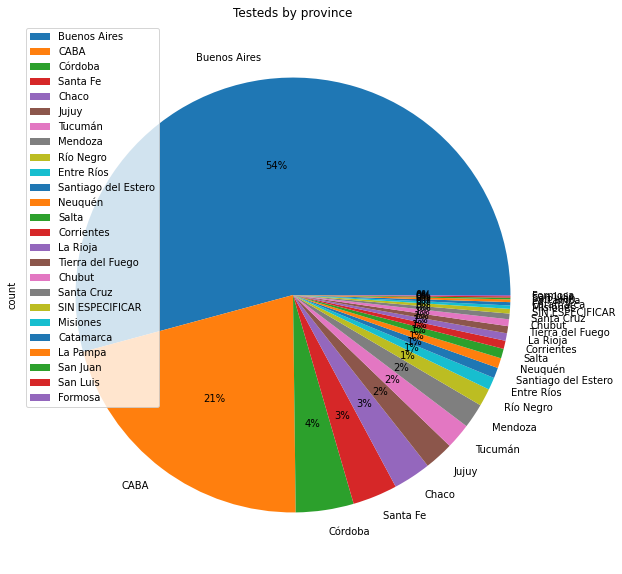

In [6]:
testedPerProvince = covidDF.copy()
testedPerProvince['count'] = testedPerProvince.groupby('residencia_provincia_nombre')['residencia_provincia_nombre'].transform('count')
testedPerProvince = testedPerProvince[['residencia_provincia_nombre', 'count']].groupby('residencia_provincia_nombre').count().reset_index().sort_values('count', ascending=False)
testedPerProvince.set_index('residencia_provincia_nombre').plot.pie(y='count', autopct='%1.0f%%', figsize=(10,10)).set_title("Testeds by province")
testedPerProvince.set_index('residencia_provincia_nombre')

## Deaths Province vs CABA

|     | fecha_fallecimiento   |   count |
|----:|:----------------------|--------:|
| 168 | 2020-08-31            |       9 |
| 167 | 2020-08-30            |      20 |
| 166 | 2020-08-29            |      19 |
| 165 | 2020-08-28            |      23 |
| 164 | 2020-08-27            |      25 |
| 163 | 2020-08-26            |      30 |
| 162 | 2020-08-25            |      29 |
| 161 | 2020-08-24            |      25 |
| 160 | 2020-08-23            |      28 |
| 159 | 2020-08-22            |      27 |
|     | fecha_fallecimiento   |   count |
|----:|:----------------------|--------:|
| 167 | 2020-08-31            |      15 |
| 166 | 2020-08-30            |      47 |
| 165 | 2020-08-29            |      51 |
| 164 | 2020-08-28            |      50 |
| 163 | 2020-08-27            |      59 |
| 162 | 2020-08-26            |      48 |
| 161 | 2020-08-25            |      67 |
| 160 | 2020-08-24            |     109 |
| 159 | 2020-08-23            |      73 |
| 158 | 2020-08-22            |   

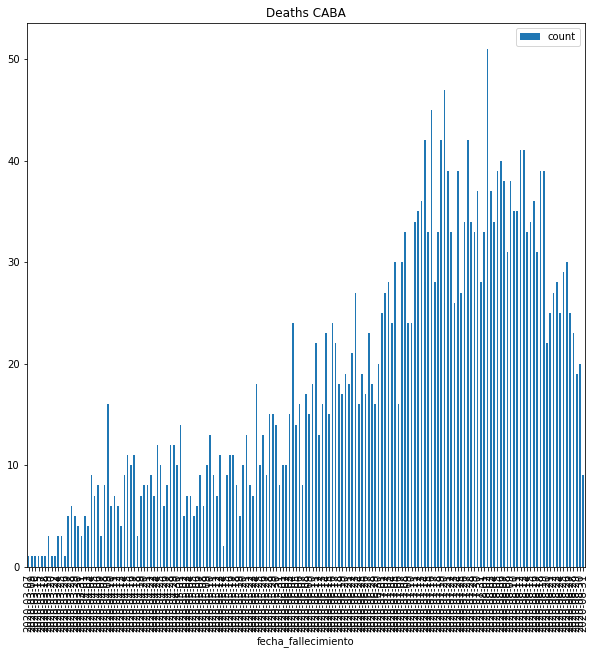

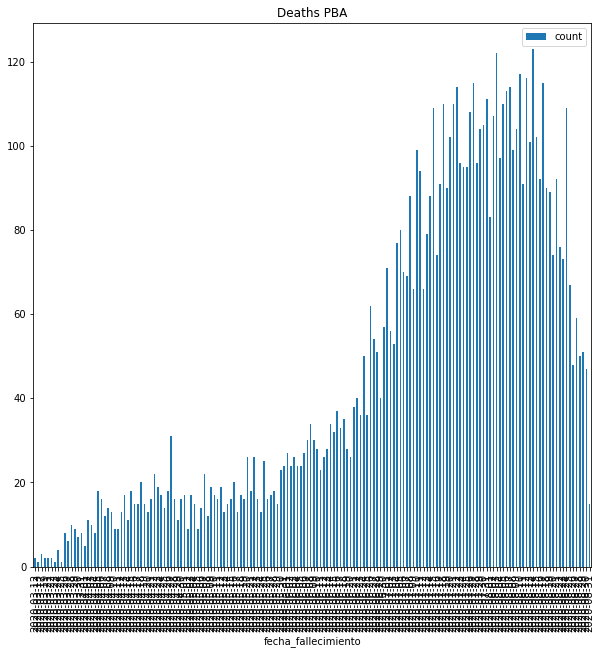

In [21]:
deathsCABA = covidDeathsDF[covidDeathsDF['residencia_provincia_nombre'] == 'CABA']
deathsCABA = deathsCABA[deathsCABA['fecha_fallecimiento'] != '']
deathsCABA['count'] = deathsCABA.groupby('fecha_fallecimiento')['fecha_fallecimiento'].transform('count')
deathsCABA = deathsCABA[['fecha_fallecimiento', 'count']].groupby('fecha_fallecimiento').count().reset_index().sort_values('fecha_fallecimiento', ascending=True)
deathsCABA.plot.bar(y='count', x='fecha_fallecimiento', figsize=(10,10)).set_title("Deaths CABA")
print(deathsCABA.sort_values('fecha_fallecimiento', ascending=False).head(10).to_markdown())

deathsPBA = covidDeathsDF[covidDeathsDF['residencia_provincia_nombre'] == 'Buenos Aires']
deathsPBA = deathsPBA[deathsPBA['fecha_fallecimiento'] != '']
deathsPBA['count'] = deathsPBA.groupby('fecha_fallecimiento')['fecha_fallecimiento'].transform('count')
deathsPBA = deathsPBA[['fecha_fallecimiento', 'count']].groupby('fecha_fallecimiento').count().reset_index().sort_values('fecha_fallecimiento', ascending=True)
deathsPBA.plot.bar(y='count', x='fecha_fallecimiento', figsize=(10,10)).set_title("Deaths PBA")
print(deathsPBA.sort_values('fecha_fallecimiento', ascending=False).head(10).to_markdown())